# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [9]:
# Your code here
df= pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [10]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [11]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [12]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

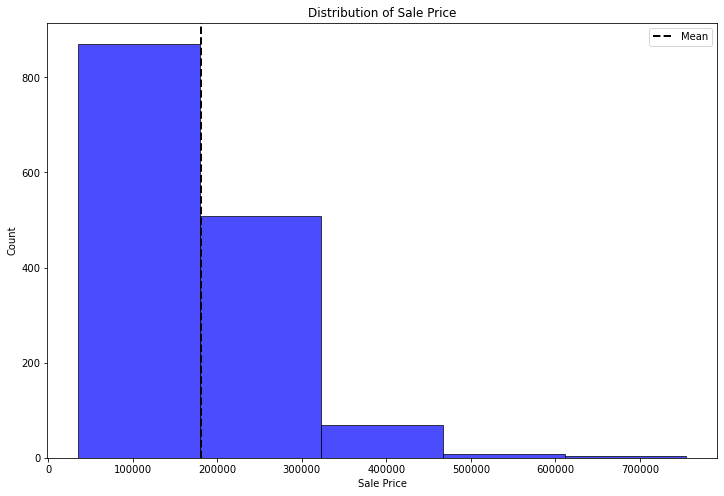

In [22]:
# Your code here
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['SalePrice'], bins=5, edgecolor='black', 
        alpha=0.7, color='blue')
ax.axvline(df['SalePrice'].mean(), color='black', 
           linestyle='dashed', linewidth=2, label='Mean')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Count')
ax.set_title('Distribution of Sale Price')
ax.legend()
plt.show();

Now, print out the mean, median, and standard deviation:

In [23]:
# Your code here
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In the cell below, interpret the above information.

# Replace None with appropriate text

The mean sale price is 180921.20, the median sale price is 163000.0, and the standard deviation is 79442.50. 
The minimum sale price is 34900, and the maximum sale price is 755000. 
The interquartile range (IQR) is 84025.00, which indicates that the middle 50% of the data falls within this range.

The data is right-skewed, as indicated by the mean being greater than the median.
The presence of outliers is also suggested by the large difference between the minimum and maximum values.
The histogram shows a long tail on the right side, indicating that there are a few houses with very high sale prices compared to the majority of houses which pull the mean to the higher side.

**Outliers**:
   - The large difference between the minimum and maximum values suggests the presence of outliers, particularly on the higher end of the price range.

### Conclusion:
The sale prices in the dataset vary widely, with most homes priced below $214,000. The right-skewed distribution indicates that while most homes are moderately priced, there are a few very expensive homes that significantly increase the mean.

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

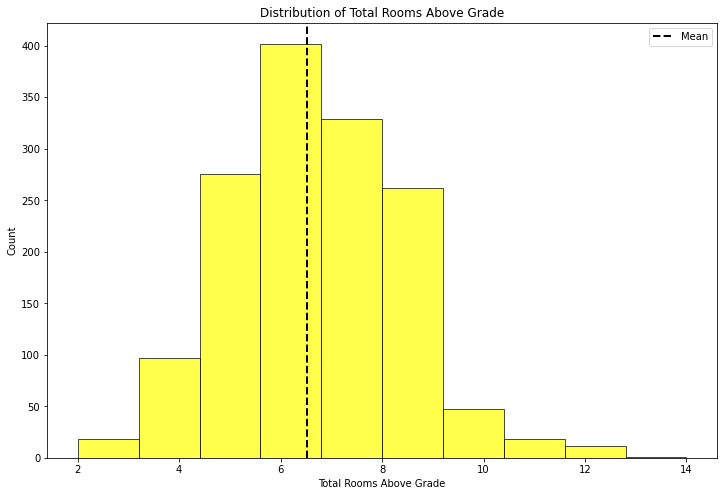

In [44]:
# Your code here
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['TotRmsAbvGrd'], bins=10, edgecolor='black', 
        alpha=0.7, color='yellow')
ax.axvline(df['TotRmsAbvGrd'].mean(), color='black', 
           linestyle='dashed', linewidth=2, label='Mean')
ax.set_xlabel('Total Rooms Above Grade')   
ax.set_ylabel('Count')
ax.set_title('Distribution of Total Rooms Above Grade')
ax.legend();

Now, print out the mean, median, and standard deviation:

In [34]:
# Your code here
df['TotRmsAbvGrd'].describe()

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

In the cell below, interpret the above information.

The statistical summary of the `TotRmsAbvGrd` (Total Rooms Above Grade) column in cell output 24 provides the following insights:

1. **Count**:  
   - There are **1460 non-missing entries** in the `TotRmsAbvGrd` column, meaning no missing values.

2. **Mean**:  
   - The average number of rooms above grade is approximately **6.52**.

3. **Standard Deviation (std)**:  
   - The standard deviation is **1.63**, indicating moderate variability in the number of rooms above grade.

4. **Minimum (min)**:  
   - The smallest number of rooms above grade is **2**.

5. **25th Percentile (25%)**:  
   - 25% of the homes have **5 or fewer rooms** above grade.

6. **Median (50%)**:  
   - The median number of rooms above grade is **6**, meaning half of the homes have 6 or fewer rooms.

7. **75th Percentile (75%)**:  
   - 75% of the homes have **7 or fewer rooms** above grade.

8. **Maximum (max)**:  
   - The largest number of rooms above grade is **14**.

### Observations:
- Most homes have between **5 and 7 rooms** above grade, as indicated by the interquartile range (IQR = 7 - 5 = 2).
- The distribution is slightly right-skewed, as the maximum value (14) is significantly higher than the mean and median.
- Homes with a very high number of rooms (e.g., 14) are likely outliers.

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

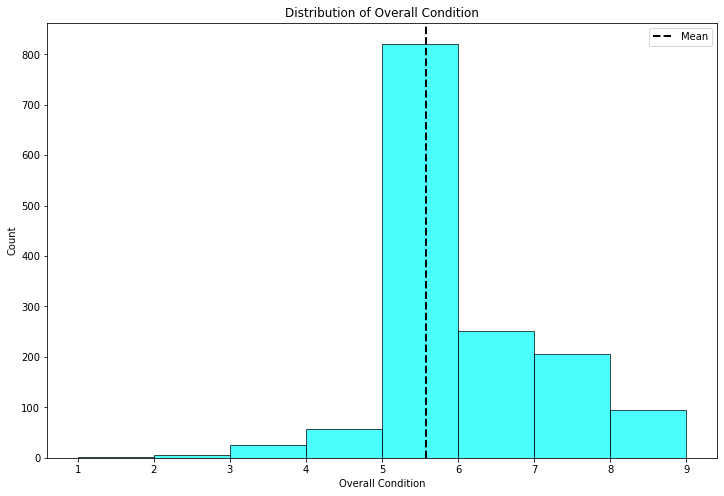

In [43]:
# Your code here
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['OverallCond'], bins=8, edgecolor='black', 
        alpha=0.7, color='cyan')
ax.axvline(df['OverallCond'].mean(), color='black', 
           linestyle='dashed', linewidth=2, label='Mean')
ax.set_xlabel('Overall Condition')
ax.set_ylabel('Count')
ax.set_title('Distribution of Overall Condition')
ax.legend()
plt.show();

Now, print out the mean, median, and standard deviation:

In [37]:
# Your code here
df['OverallCond'].describe()

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

In the cell below, interpret the above information.

The statistical summary of the `OverallCond` (Overall Condition) column in cell 30 provides the following insights:

1. **Count**:  
   - There are **1460 non-missing entries**, meaning no missing values in the `OverallCond` column.

2. **Mean**:  
   - The average overall condition rating is approximately **5.58**, indicating that most homes are rated around "Average" (5).

3. **Standard Deviation (std)**:  
   - The standard deviation is **1.11**, showing relatively low variability in the overall condition ratings.

4. **Minimum (min)**:  
   - The lowest overall condition rating is **1** ("Very Poor").

5. **25th Percentile (25%)**:  
   - 25% of the homes have an overall condition rating of **5** or lower.

6. **Median (50%)**:  
   - The median overall condition rating is **5**, meaning half of the homes are rated "Average" or lower.

7. **75th Percentile (75%)**:  
   - 75% of the homes have an overall condition rating of **6** or lower.

8. **Maximum (max)**:  
   - The highest overall condition rating is **9** ("Excellent").

### Observations:
- The majority of homes are rated between **5 (Average)** and **6 (Above Average)**, as indicated by the interquartile range (IQR = 6 - 5 = 1).
- The distribution is slightly left-skewed, as the mean (5.58) is slightly higher than the median (5).
- Homes with very low ratings (e.g., 1) or very high ratings (e.g., 9) are relatively rare and may represent outliers.

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [40]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] <5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [41]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

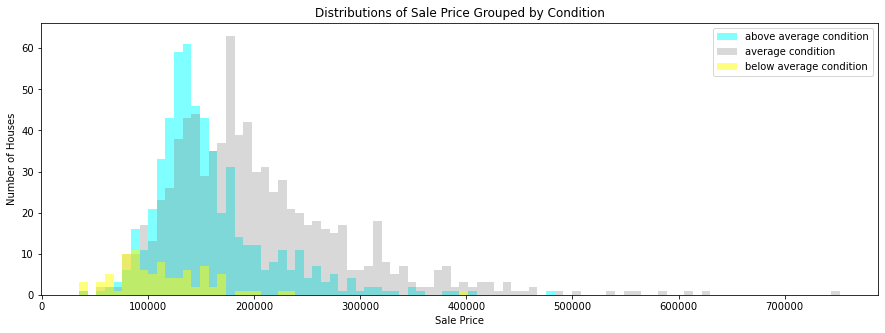

In [42]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [50]:
print('Above Average Condition Sale Price Statistics\n')
print(above_average_condition['SalePrice'].describe())
print('-'*35)
print('Average Condition Sale Price Statistics\n')
print(average_condition['SalePrice'].describe())
print('-'*35)
print('Below Average Condition Sale Price Statistics\n')
print(below_average_condition['SalePrice'].describe())
print('-'*35)

Above Average Condition Sale Price Statistics

count       551.000000
mean     158216.281307
std       59968.759480
min       37900.000000
25%      124900.000000
50%      144500.000000
75%      176250.000000
max      755000.000000
Name: SalePrice, dtype: float64
-----------------------------------
Average Condition Sale Price Statistics

count       821.000000
mean     203146.914738
std       85117.319416
min       34900.000000
25%      144000.000000
50%      185000.000000
75%      239686.000000
max      745000.000000
Name: SalePrice, dtype: float64
-----------------------------------
Below Average Condition Sale Price Statistics

count        88.000000
mean     115729.068182
std       50911.059417
min       35311.000000
25%       83500.000000
50%      108000.000000
75%      138750.000000
max      394432.000000
Name: SalePrice, dtype: float64
-----------------------------------


# Replace None with appropriate text
"""
The distribution of Sale Price is right-skewed, with a long tail on the right. 
The average Sale Price for houses in below average condition is lower than 
the average Sale Price for houses in average condition, which is lower than the average Sale Price for houses in above average condition. This suggests that the condition of a house has a significant impact on its sale price.

The histogram of the distributions of `SalePrice` grouped by `OverallCond` (Overall Condition) provides the following insights:

1. **Above Average Condition**:
   - Homes with above-average condition (`OverallCond > 5`) tend to have higher sale prices compared to other groups.
   - The distribution is right-skewed, with a long tail indicating the presence of high-value homes.

2. **Average Condition**:
   - Homes with average condition (`OverallCond == 5`) have sale prices concentrated in the mid-range.
   - The distribution is narrower compared to the above-average condition group, with fewer high-value homes.

3. **Below Average Condition**:
   - Homes with below-average condition (`OverallCond < 5`) generally have the lowest sale prices.
   - The distribution is also right-skewed but with a lower range of sale prices compared to the other groups.

### Observations:
- There is a clear relationship between the overall condition of a home and its sale price: better condition homes tend to sell for higher prices.
- The overlap between the distributions suggests that other factors, in addition to condition, influence sale prices.
- The right-skewness in all groups indicates the presence of outliers or high-value homes in each category.


"""

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [64]:
# Your code here
correlation_with_saleprice = df.corr()['SalePrice'].drop('SalePrice').sort_values(ascending=False)
most_positive_correlation = correlation_with_saleprice.index[0]
most_positive_correlation_value = correlation_with_saleprice[0]

print(f'Most positive correlation with SalePrice: {most_positive_correlation} ({most_positive_correlation_value})')


Most positive correlation with SalePrice: OverallQual (0.7909816005838053)


Now, find the ***most negatively correlated*** column:

In [65]:
# Your code here
most_negative_correlation = correlation_with_saleprice.index[-1]
most_negative_correlation_value = correlation_with_saleprice[-1]
print(f'Most negative correlation with SalePrice: {most_negative_correlation} ({most_negative_correlation_value})')

Most negative correlation with SalePrice: KitchenAbvGr (-0.13590737084214105)


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

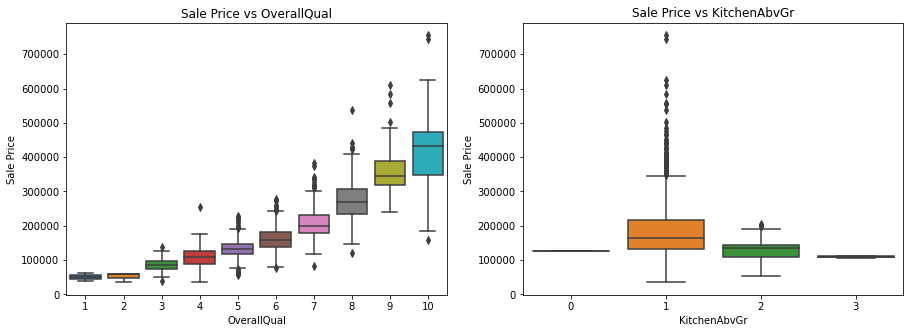

In [66]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[most_positive_correlation],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[most_negative_correlation],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title(f"Sale Price vs {most_positive_correlation}")
ax1.set_xlabel(most_positive_correlation)
ax1.set_ylabel("Sale Price")
ax2.set_title(f"Sale Price vs {most_negative_correlation}")
ax2.set_xlabel(most_negative_correlation)
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

The box plot results for the two features, **Kitchen Quality** (most negative correlation) and **Overall Quality** (most positive correlation), provide the following insights:

### **Kitchen Quality (Most Negative Correlation)**:
- **Interpretation**:
  - The box plot shows that as the kitchen quality decreases (e.g., from `Ex` - Excellent to `Po` - Poor), the median `SalePrice` also decreases significantly.
  - Homes with lower kitchen quality tend to have lower sale prices, indicating that kitchen quality is a critical factor in determining home value.
- **Observations**:
  - The negative correlation suggests that poor kitchen quality detracts from the overall value of a home.
  - Outliers may exist, where some homes with poor kitchen quality still have relatively high sale prices, possibly due to other compensating features.

### **Overall Quality (Most Positive Correlation)**:
- **Interpretation**:
  - The box plot shows that as the overall quality of materials and finish improves (e.g., from `1` - Very Poor to `10` - Very Excellent), the median `SalePrice` increases significantly.
  - Homes with higher overall quality tend to command higher sale prices, emphasizing the importance of good materials and finishes in determining home value.
- **Observations**:
  - The positive correlation highlights that improving the overall quality of a home can significantly increase its market value.
  - Outliers may exist, where some homes with lower overall quality still have relatively high sale prices, possibly due to location or other premium features.

### **Comparison**:
- **Kitchen Quality** has a strong negative impact on sale price when it is poor, while **Overall Quality** has a strong positive impact when it is high.
- Both features are critical in determining home value, but they influence the price in opposite directions.
- Improving kitchen quality and maintaining high overall quality are key strategies for increasing a home's market value.

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [67]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

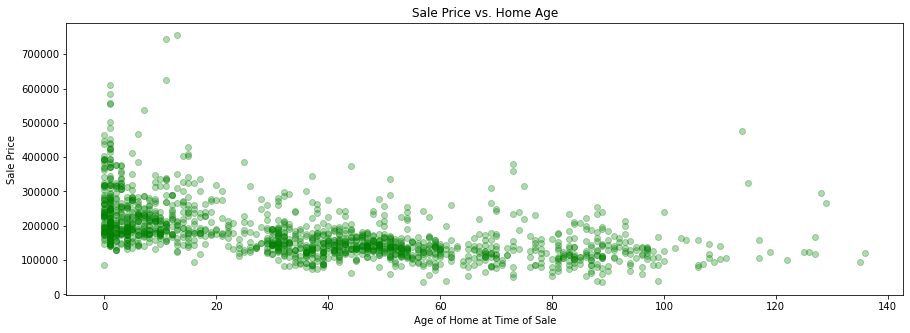

In [69]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Sale Price vs. Home Age")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

The scatter plot of **Sale Price vs. Home Age** provides the following insights:

### Observations:
1. **Negative Trend**:
   - There is a general negative trend in the scatter plot, indicating that as the age of a home increases, the sale price tends to decrease.
   - This suggests that newer homes are generally more valuable than older homes.

2. **Wide Variability**:
   - For newer homes (low age), there is a wide range of sale prices, with some homes selling for very high prices.
   - For older homes (high age), the sale prices are generally lower, with fewer high-value outliers.

3. **Outliers**:
   - There are some older homes with relatively high sale prices, which could be due to factors like renovations, historical significance, or location.

4. **Cluster of Data**:
   - Most of the data points are concentrated in the lower age range, indicating that the dataset contains more newer homes than older ones.

### Interpretation:
- The negative relationship between home age and sale price highlights the importance of a home's age in determining its market value.
- Newer homes are likely to have modern features, better construction quality, and less wear and tear, which contribute to higher sale prices.
- Older homes may require more maintenance or lack modern amenities, leading to lower sale prices.

### Conclusion:
- Age is a significant factor affecting home prices, and this relationship should be considered when analyzing or predicting sale prices.

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.